## Tarea 1 Reconocimiento de Patrones
### Javier Peralta

1.- Machine Learning o aprendizage de máquina es una disciplina que combina la computación con la estadistica y trata de resolver dos grandes preguntas. Como podemos predecir nuevos datos con los datos que se tienen y que información podemos obtener de los datos para mejor entender los fenómenos que los gobiernan. Com machine learning se pueden crear varias aplicaciónes practicas para facilitar y automatizar tareas cotidianas y para mejorar y expandir nuestro conocimiento.

Machine Learning se divide en dos areas principales. Aprendizage supervisado y no supervisado. El aprendizage supervisado incluye clasificadores de spam, reconocimiento facial en imágenes sistemas médicos para diagnosticos y varios problemas donde los datos toman la forma de una colleción de pares $(x, y)$ y queremos predecir el valor $\hat{y}$ dada una entrada $x$. En el aprendizage no supervisado no tenemos un valor $y$ a predecir y queremos aprender más sobre los datos. Se utilizan algoritmos de clustering para entender que datos son similares entre sí al igual que métodos de reducción de dimensión como **PCA**. Otra gran area de Machine Learning combina las otras dos, el aprendizage con refuerzos, aquí los datos no son en pares, pero nos dan información sobre la predicción que se realizó. Si es correcta refuerza nuestra predicción y si es incorrecta nos indica que aún tenemos que encontrar un buen predictor.

### 2
Para un estudio se mide la temperatura en diferentes posiciones del cuerpo de una muestra de personas. Un investigador expresa todas las temperaturas en grados Celcius. Otro investigador convierte primero todas estas temperaturas a grados Fahrenheit.

Si ambos deciden hacer PCA, ¿obtendrón las mismas direcciones de proyección?
    
>Sí. LLamemos $C$ la matriz de temperaturas en Celcius, con las filas $C_i$ perteneciendo a una observación y $F$ la matriz de temperaturas en Fahrenheit, sabemos que $C = \frac{F - 32}{1.80}$ Por las propiedades de la Covarianza $Cov(X_i+a,\,\, X_j+b) = Cov(X_i,\,\,X_j)$ y $Cov(aX_i,\,\, bX_j) = abCov(X_i,\,\,X_j)$ tenemos que
$Cov(C) = \frac{Cov(F)}{1.80^2}$. Sí tomamos la descomposición espectral $Cov(F) = \mathbb{U}_F\mathbb{D}_F\mathbb{U}_F^T$ Donde $\mathbb{U}_F$ es la matriz de vectores propios de $Cov(F)$. Usando nuestra igualdad de $Cov(C)$ con $Cov(F)$ obtenemos que $1.8 * Cov(C) = \mathbb{U}_F\mathbb{D}_F\mathbb{U}_F^T$. Por lo tanto $\mathbb{U}_F/1.8 = \mathbb{U}_C$ tiene los eigenvectore de $Cov(C)$. Si normalizamos los eigenvectores de $Cov(C)$ y $Cov(F)$ podemos ver que son iguales. Por lo que las direcciones de proyección para C y F son las mismas.

### 3
Sea $X$ una v.a. multidimensional con matriz de covarianza $Cov(X)$ y $EX = 0$. Si $l$ es un vector propio de $Cov(X)$ con valor propio $\lambda$ y $Y = <l, X>$ muestra que

$$Cov(Y, X_i) = \lambda l_i$$

con $l_i$ entrada $i$ del vector $l$.

> $$Cov(Y, X_i) = E(Y - EY)(X_i - EX_i)^t$$ Sabesmos que $EX_i = 0$ y $Y_i = \sum_j{lj*X_{i,j}}$. Por las propiedades de la esperanza $E(X+Y) = EX + EY$ y $E(aX) = aEX$ tenemos que $EY = 0$.
> Con esto tenemos que $$Cov(Y, X_i) = EYX_i^t = l^t\,X\,X_i^t$$ Dado que el resultado es un escalar. Podemos tomar su transpuesta sin problema $Cov(Y, X_i) = X_i\,X^t\,l$, $X_i\,X^t$ es el vector fila **i** de la matriz $Cov(X)$. Como $Cov(X)l = \lambda l$ por propiedades de los eigenvectores tenemos que $Cov(X)_i l = \sum_j{X_{ij}*l_j} =  \lambda l_i$

### 4
Un problema en un heptatlón es cómo convertir los resultados obtenidos en las diferentes pruebas en un puntaje final. En este ejercicio usamos PCA para este problema.

En el archivo heptatlón se pueden consultar los tiempos y el puntaje final (score) de 25 atletas que participaron en el heptatlón durante los juegos olímpicos de Seoul. Visualiza los datos. Haz un análisis de componentes principales con los tiempos (sin score). Hay una relación entre el score y las proyecciones sobre el primer CP?

In [1]:
d <- read.table("heptatlon")
head(d)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411


In [2]:
score <- d[8]
d <- d[-8]
p <- princomp(d)
summary(p)

Importance of components:
                          Comp.1    Comp.2    Comp.3      Comp.4      Comp.5
Standard deviation     8.1956429 3.5184227 1.3577008 0.573879298 0.317274394
Proportion of Variance 0.8206996 0.1512566 0.0225230 0.004024012 0.001229952
Cumulative Proportion  0.8206996 0.9719562 0.9944792 0.998503190 0.999733142
                             Comp.6       Comp.7
Standard deviation     0.1441496680 3.257782e-02
Proportion of Variance 0.0002538899 1.296768e-05
Cumulative Proportion  0.9999870323 1.000000e+00

Para evitar que las unidades y la varianza de un evento tengan más peso. Normalizamos los datos haciendo su promedio 0 y su varianza 1

In [3]:
scaled.dat <- scale(d)

In [4]:
head(scaled.dat)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Joyner-Kersee (USA),-1.5611259,1.0007405,1.7979946,-2.154798275,2.3567502,1.1782304,-0.9098926
John (GDR),-1.3439258,0.2309401,2.0862207,-1.030573634,1.1758446,0.3039212,-1.1981540
Behmer (GDR),-0.8688005,0.6158403,0.7255254,-1.597842949,1.1125818,0.8623510,-1.4297279
Sablovskaite (URS),-0.3122252,0.2309401,1.4159274,-0.752095971,0.2058150,0.3659689,-0.4600120
Choubenkova (URS),-0.4479753,-0.5388603,1.1008896,-0.741781983,0.3534282,1.6858939,-0.9834656
Schulz (GDR),-0.1221751,0.6158403,0.2563201,0.000825119,0.3745158,0.3772503,-1.2379557


Consideramos que para algunos eventos, menor tiempo es mejor y para otros mayor puntaje es mejor

In [5]:
scaled.dat[1] = scaled.dat[1]*-1
scaled.dat[4] = scaled.dat[4]*-1
scaled.dat[7] = scaled.dat[7]*-1

In [6]:
p <- prcomp(scaled.dat)
summary(p)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0052 1.1430 0.74210 0.68062 0.59276 0.46799 0.21665
Proportion of Variance 0.5778 0.1878 0.07914 0.06657 0.05049 0.03147 0.00675
Cumulative Proportion  0.5778 0.7656 0.84471 0.91129 0.96178 0.99325 1.00000

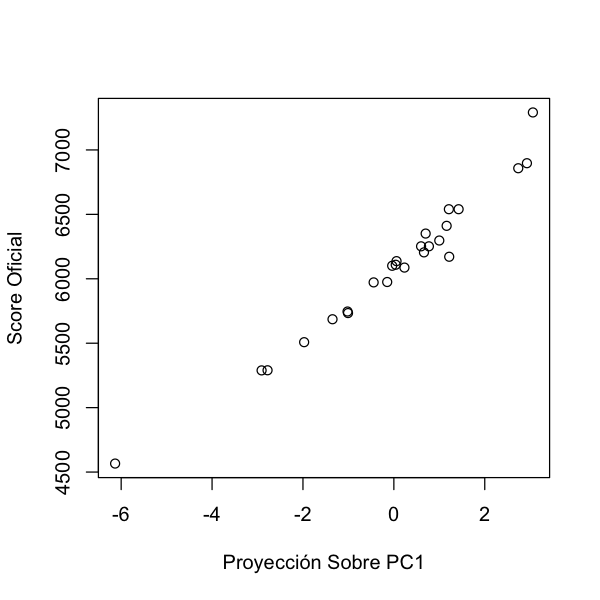

In [7]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)
plot(p$x[,1], score[,1], ylab="Score Oficial", xlab="Proyección Sobre PC1")

Podemos ver que hay una relación lineal entre los score y las proyecciones sobre el primer componente principal. Aun que algunos valores de la proyección no mantienen el orden de los scores, en promedio se hace bien. Dado que el primer componente sólo corresponde al 57% de la varianza en los datos este no es del todo perfecto.

### 5
Considera los datos oef2.data. Se trata de los promedios mensuales de la temperatura (en Celsius) en 35 estaciones canadienses de monitoreo. El interés es comparar las estaciones entre sí en base de sus curvas de
temperatura.

Considerando las 12 mediciones por estación como un vector X, aplica un análisis de componentes principales. Como X representa (un muestreo de) una curva, este tipo de datos se llama datos funcionales. Interpreta y dibuja (como curva) los primeros dos componentes, p1, p2 es decir grafica $\{(i, \,\,p1_i)\}$ y $\{(i, \,\,p2_i)\}$. Agrupa e interpreta las estaciones en el biplot (ten en mente un mapa de Canada).

In [56]:
temp <- matrix(scan("oef2.data"), 35, 12, byrow=T)
nombresestaciones <- c("St. John_s", "Charlottetown", "Halifax" ,
"Sydney", "Yarmouth", "Fredericton",
"Arvida", "Montreal", "Quebec City",
"Schefferville", "Sherbrooke", "Kapuskasing",
"London", "Ottawa", "Thunder Bay",
"Toronto", "Churchill", "The Pas",
"Winnipeg", "Prince Albert", "Regina",
"Beaverlodge", "Calgary", "Edmonton",
"Kamloops", "Prince George", "Prince Rupert",
"Vancouver", "Victoria", "Dawson",
"Whitehorse", "Frobisher Bay", "Inuvik",
"Resolute", "Yellowknife")

rownames(temp)<-nombresestaciones
head(temp)

St. John_s,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
Charlottetown,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
Halifax,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
Sydney,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
Yarmouth,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3
Fredericton,-9.2,-8.4,-2.4,4.1,10.8,16.2,19.3,18.2,13.2,7.5,1.4,-6.5


In [51]:
p <-prcomp((temp), scale = TRUE)
summary(p)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1907 1.2214 0.47193 0.25816 0.13157 0.09983 0.07084
Proportion of Variance 0.8484 0.1243 0.01856 0.00555 0.00144 0.00083 0.00042
Cumulative Proportion  0.8484 0.9727 0.99124 0.99679 0.99823 0.99906 0.99948
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.05640 0.03659 0.02895 0.02160 0.01976
Proportion of Variance 0.00027 0.00011 0.00007 0.00004 0.00003
Cumulative Proportion  0.99975 0.99986 0.99993 0.99997 1.00000

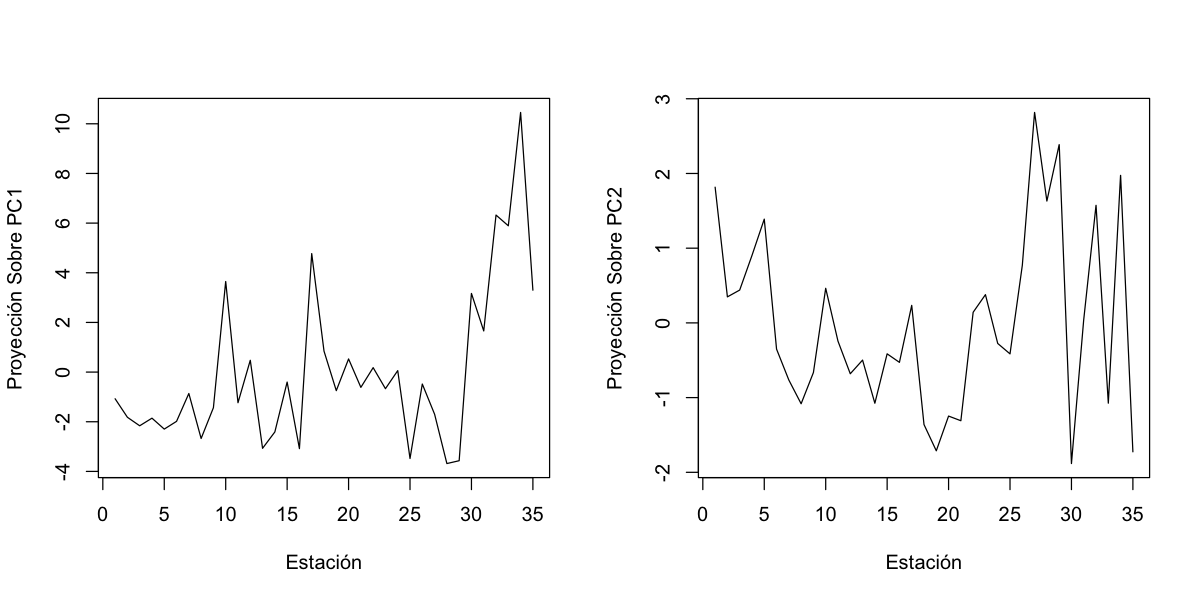

In [52]:
library(repr)
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(p$x[,1], ylab="Proyección Sobre PC1", xlab="Estación", type='l')
plot(p$x[,2], ylab="Proyección Sobre PC2", xlab="Estación", type='l')

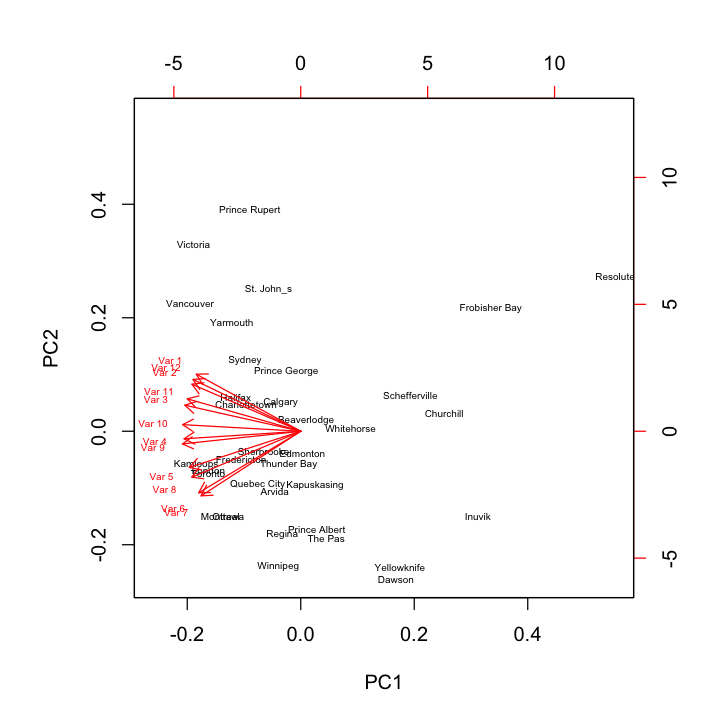

In [55]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(p, cex=0.5)

Podemos interpertar la cercanía de las estaciones en el biplot como su similitud en temperaturas durante el año y esto se puede comprobar por su cercanía geográfica. El primer componente se puede interpretar como la temperatura promedio. Con las estaciones a la izquierda teniendo temperaturas promedio más altas y la segunda componente se puede ver como temperaturas en invierno vs verano.

### 6
Sea K una matriz simétrica y positiva definida con rango r. Un resultado clásico de Rao dice que la matriz simétrica B de rango p < r que minimiza:
$$ ||K-B||_F$$
está dada por
$$ B = \sum_{i=1}^{p}{\lambda_i v_i v_i^t}$$

donde las $\{vi\}$ corresponden a los vectores propios ordenados de mayor
a menor segun valor propio $\lambda_i$ de $K$ y $|| · ||_F$ es la norma de Frobenius.

Verifica que en el mínimo $$ ||K-B||_F^2 = \sum_{i=p+1}^{r}{\lambda_i}$$

>La norma Frobenius está dada por $||A||_F^2 = \sum_{i, j}{a_{i,j}^2} = Trace(AA^T) = Trace(VDV^T\,VDV^T)$. Usando la ortogonalidad de los valores propios $||A||_F^2 = Trace(V\Lambda\Lambda V^T) = Trace(\Lambda \Lambda VV^T) = Trace(\Lambda\Lambda) = \sum{\lambda^2}$

>Tenemos que $K = V \Lambda V^t = \sum_{i=1}^{r}{\lambda_i v_i v_i^t}$ por lo que $||K-B||_F^2 = ||\sum_{i=p+1}^{r}{\lambda_i v_i v_i^t}||_F^2$. $K-B$ nos da una matriz con rango $r - p$ por lo que sólo tiene $r - p$ eigenvalores distintos a cero, los cuales son $\lambda_i \, i \in [p+1, r]$ donde $\lambda_i$ son eigenvalores de K. Con esto tenemos que $$||K-B||_F^2 = ||\sum_{i=p+1}^{r}{\lambda_i v_i v_i^t}||_F^2 = \sum_{i=p+1}^{r}{\lambda_i}$$